In [ ]:
#https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

%matplotlib inline

In [2]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [14]:
df = pd.read_csv("./Desktop/autos.csv")


D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
357695,4/4/2016 7:58,Bmw_730LD_soft_close_keyless_go__SPORTPAKET_DI...,privat,Angebot,13500.0,test,limousine,2007.0,automatik,231.0,7er,150000,9.0,diesel,bmw,nein,4/4/2016 0:00,0.0,51103.0,4/6/2016 10:17
258870,3/9/2016 13:37,Fiat_grande_Punto_Abarth,privat,Angebot,6000.0,control,kleinwagen,2017.0,manuell,155.0,punto,150000,5.0,benzin,fiat,nein,3/9/2016 0:00,0.0,41836.0,3/21/2016 13:17
20101,3/12/2016 14:38,VW_Passat__Rot_,privat,Angebot,1100.0,test,kombi,2001.0,automatik,131.0,passat,150000,10.0,diesel,volkswagen,ja,3/12/2016 0:00,0.0,26789.0,3/12/2016 14:38
61581,4/1/2016 16:06,Audi_RS5_S_tronic__Schalensitze_Klappenauspuff,privat,Angebot,34800.0,control,coupe,2011.0,automatik,450.0,andere,100000,12.0,benzin,audi,nein,4/1/2016 0:00,0.0,63303.0,4/7/2016 10:45
357846,3/29/2016 20:50,Ford_C_MAX_1.6_TDCi_Start_Stop_System,privat,Angebot,10500.0,test,bus,2012.0,manuell,116.0,c_max,20000,6.0,diesel,ford,nein,3/29/2016 0:00,0.0,50374.0,4/6/2016 7:17
99041,3/11/2016 22:52,BMW_325i_touring_M_Sportpaket__Schiebedach__Xenon,privat,Angebot,9600.0,control,kombi,2005.0,manuell,192.0,3er,100000,3.0,benzin,bmw,nein,3/11/2016 0:00,0.0,72639.0,3/12/2016 21:15
183385,3/29/2016 17:39,Opel_Signum_1.9_CDTI_Edition_/_Leder_/_Navi_/_...,privat,Angebot,6450.0,control,kombi,2008.0,manuell,120.0,signum,150000,1.0,diesel,opel,nein,3/29/2016 0:00,0.0,36282.0,4/6/2016 3:15
174263,3/23/2016 20:46,Volkswagen_Volkswagen_Touran_1.2_TSI_BlueM._/_...,privat,Angebot,10680.0,test,bus,2010.0,manuell,105.0,touran,70000,8.0,benzin,volkswagen,nein,3/23/2016 0:00,0.0,30167.0,3/23/2016 20:46
256811,3/12/2016 4:02,Mitsubishi_czt,privat,Angebot,3300.0,test,limousine,2005.0,manuell,150.0,colt,150000,1.0,benzin,mitsubishi,nein,3/12/2016 0:00,0.0,67227.0,3/12/2016 23:45
133857,3/28/2016 17:46,Opel_Astra_GTC_1.9_CDTI_DPF_NAVI,privat,Angebot,7900.0,test,limousine,2008.0,manuell,150.0,astra,125000,12.0,diesel,opel,nein,3/28/2016 0:00,0.0,72202.0,4/6/2016 23:17


In [16]:
df.describe()


,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,3.715380e+05,371537.000000,371538.000000,371537.000000,371537.0,371537.000000
mean,1.729544e+04,2004.577883,115.548840,5.734473,0.0,50820.666402
std,3.587905e+06,92.865496,192.137238,3.712383,0.0,25799.080292
min,0.000000e+00,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,70.000000,3.000000,0.0,30459.000000
50%,2.950000e+03,2003.000000,105.000000,6.000000,0.0,49610.000000
75%,7.200000e+03,2008.000000,150.000000,9.000000,0.0,71546.000000
max,2.147484e+09,9999.000000,20000.000000,12.000000,0.0,99998.000000


In [17]:
print(df.seller.unique())
print(df.offerType.unique())
print(df.abtest.unique())
print(df.nrOfPictures.unique())

['privat' 'gewerblich' nan 'golf']
['Angebot' 'Gesuch' nan '150000']
['test' 'control' nan 'benzin']
[ 0. nan]


In [18]:
df.drop(['seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns', inplace=True)

In [19]:
print("Too new: %d" % df.loc[df.yearOfRegistration >= 2017].count()['name'])
print("Too old: %d" % df.loc[df.yearOfRegistration < 1950].count()['name'])
print("Too cheap: %d" % df.loc[df.price < 100].count()['name'])
print("Too expensive: " , df.loc[df.price > 150000].count()['name'])
print("Too few km: " , df.loc[df.kilometer < 5000].count()['name'])
print("Too many km: " , df.loc[df.kilometer > 200000].count()['name'])
print("Too few PS: " , df.loc[df.powerPS < 10].count()['name'])
print("Too many PS: " , df.loc[df.powerPS > 500].count()['name'])
print("Fuel types: " , df['fuelType'].unique())
#print("Offer types: " , df['offerType'].unique())
#print("Sellers: " , df['seller'].unique())
print("Damages: " , df['notRepairedDamage'].unique())
#print("Pics: " , df['nrOfPictures'].unique()) # nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
#print("Postale codes: " , df['postalCode'].unique())
print("Vehicle types: " , df['vehicleType'].unique())
print("Brands: " , df['brand'].unique())

Too new: 14680
Too old: 289
Too cheap: 13321
Too expensive:  233


TypeError: '<' not supported between instances of 'str' and 'int'

In [20]:
# Cleaning data
#valid_models = df.dropna()

#### Removing the duplicates
dedups = df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])

#### Removing the outliers
dedups = dedups[
        (dedups.yearOfRegistration <= 2016) 
      & (dedups.yearOfRegistration >= 1950) 
      & (dedups.price >= 100) 
      & (dedups.price <= 150000) 
      & (dedups.powerPS >= 10) 
      & (dedups.powerPS <= 500)]

print("-----------------\nData kept for analisys: %d percent of the entire set\n-----------------" % (100 * dedups['name'].count() / df['name'].count()))

-----------------
Data kept for analisys: 82 percent of the entire set
-----------------


In [21]:
dedups.isnull().sum()


name                       0
price                      0
vehicleType            10830
yearOfRegistration         0
gearbox                 5266
powerPS                    0
model                  11368
kilometer                  0
monthOfRegistration        0
fuelType               15419
brand                      0
notRepairedDamage      42230
dtype: int64

In [22]:
dedups['notRepairedDamage'].fillna(value='not-declared', inplace=True)
dedups['fuelType'].fillna(value='not-declared', inplace=True)
dedups['gearbox'].fillna(value='not-declared', inplace=True)
dedups['vehicleType'].fillna(value='not-declared', inplace=True)
dedups['model'].fillna(value='not-declared', inplace=True)

In [23]:
dedups.isnull().sum()


name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

gearbox
manuell         232672
automatik        67074
not-declared      5266
Name: gearbox, dtype: int64


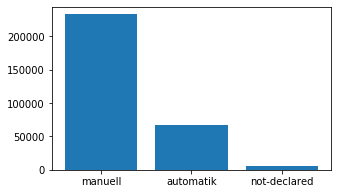

model
golf            24917
andere          21787
3er             17760
not-declared    11368
polo            10498
Name: model, dtype: int64


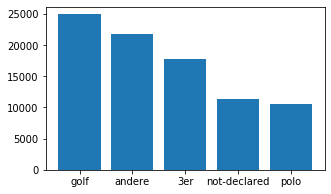

brand
volkswagen       65020
bmw              34559
opel             31865
mercedes_benz    29639
audi             28079
Name: brand, dtype: int64


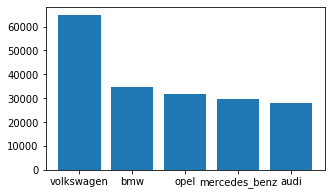

vehicleType
limousine     85088
kleinwagen    68607
kombi         60071
bus           27064
cabrio        20973
Name: vehicleType, dtype: int64


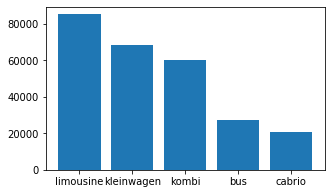

fuelType
benzin          190432
diesel           93628
not-declared     15419
lpg               4660
cng                476
Name: fuelType, dtype: int64


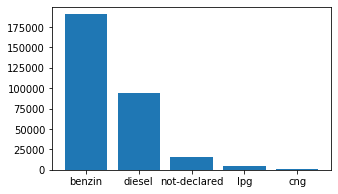

notRepairedDamage
nein            234398
not-declared     42230
ja               28384
Name: notRepairedDamage, dtype: int64


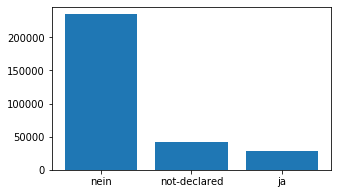

In [24]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


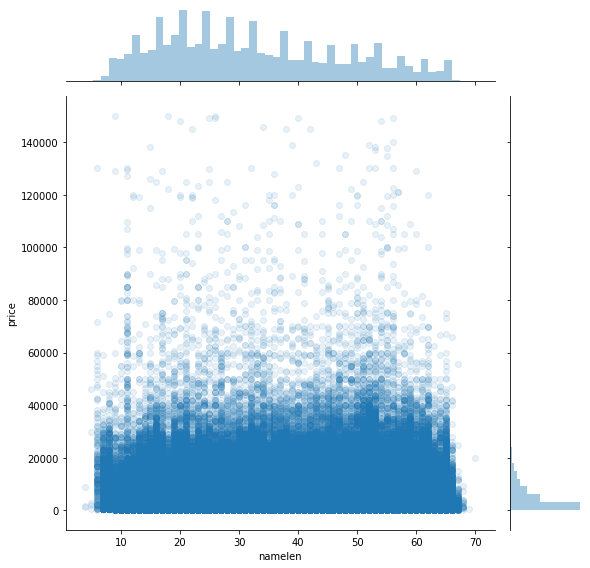

In [25]:
dedups['namelen'] = [min(70, len(n)) for n in dedups['name']]

ax = sns.jointplot(x='namelen', 
                   y='price',
                   data=dedups[['namelen','price']], 
#                   data=dedups[['namelen','price']][dedups['model']=='golf'], 
                    alpha=0.1, 
                    size=8)

In [26]:
labels = ['name', 'gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(dedups[l])
    tr = les[l].transform(dedups[l]) 
    dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

labeled = dedups[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        , 'namelen'] 
                    + [x+"_feat" for x in labels]]


In [27]:
len(labeled['name_feat'].unique()) / len(labeled['name_feat'])


0.6206149266258377

In [28]:
labeled.drop(['name_feat'], axis='columns', inplace=True)


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,price,yearOfRegistration,powerPS,monthOfRegistration,namelen,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
price,1.000000,0.385485,0.572964,0.045001,0.186168,-0.297566,-0.002509,-0.012447,-0.105580,0.056220,-0.010858
yearOfRegistration,0.385485,1.000000,0.186546,0.044556,0.158887,-0.094903,-0.015737,0.041305,-0.044493,0.142623,0.058957
powerPS,0.572964,0.186546,1.000000,0.038802,0.106204,-0.447441,-0.022650,-0.132734,-0.310198,0.086558,0.112427
monthOfRegistration,0.045001,0.044556,0.038802,1.000000,0.044249,-0.049883,-0.050273,-0.009101,-0.012180,-0.035775,-0.004211
namelen,0.186168,0.158887,0.106204,0.044249,1.000000,-0.150844,-0.008306,0.078565,0.100104,0.043840,-0.026680
gearbox_feat,-0.297566,-0.094903,-0.447441,-0.049883,-0.150844,1.000000,0.038852,0.046877,0.125744,-0.057562,-0.092376
notRepairedDamage_feat,-0.002509,-0.015737,-0.022650,-0.050273,-0.008306,0.038852,1.000000,0.017781,0.016417,0.061947,0.027167
model_feat,-0.012447,0.041305,-0.132734,-0.009101,0.078565,0.046877,0.017781,1.000000,0.472140,0.049083,-0.136074
brand_feat,-0.105580,-0.044493,-0.310198,-0.012180,0.100104,0.125744,0.016417,0.472140,1.000000,-0.023877,-0.102585
fuelType_feat,0.056220,0.142623,0.086558,-0.035775,0.043840,-0.057562,0.061947,0.049083,-0.023877,1.000000,0.090134


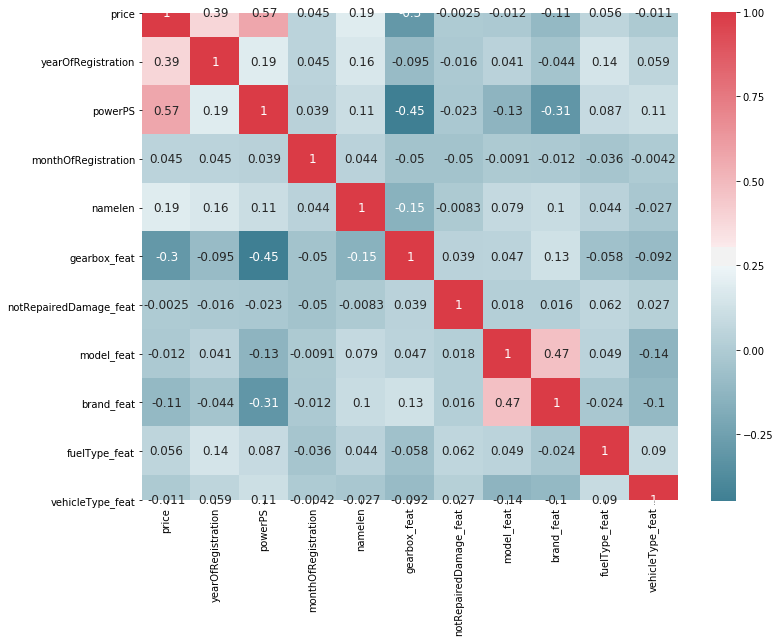

In [29]:
plot_correlation_map(labeled)
labeled.corr()

In [30]:
labeled.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]


powerPS                   0.572964
yearOfRegistration        0.385485
gearbox_feat              0.297566
namelen                   0.186168
brand_feat                0.105580
fuelType_feat             0.056220
monthOfRegistration       0.045001
model_feat                0.012447
vehicleType_feat          0.010858
notRepairedDamage_feat    0.002509
Name: price, dtype: float64

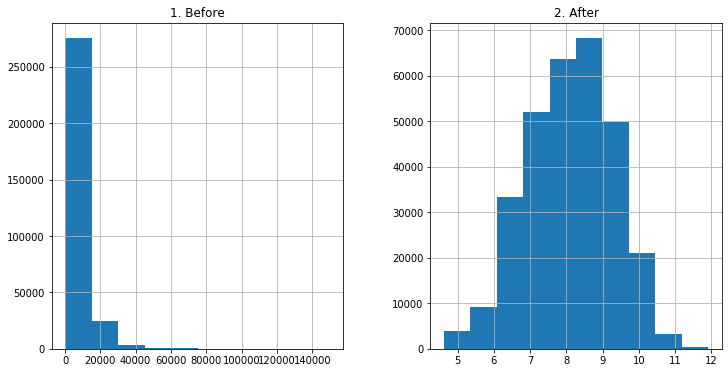

In [31]:
Y = labeled['price']
X = labeled.drop(['price'], axis='columns', inplace=False)


matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"1. Before":Y, "2. After":np.log1p(Y)})
prices.hist()

Y = np.log1p(Y)

In [32]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split

def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r

# Percent of the X array to use as training set. This implies that the rest will be test set
test_size = .33

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=test_size, random_state = 3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

r = range(2003, 2017)
km_year = 10000

(204358, 11) (100654, 11) (204358,) (100654,)


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.8min finished


In [34]:
print(gs.best_score_)
print(gs.best_params_)
 

0.827367332682132
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [35]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_val, y_val))

Score: 0.83


Feature ranking:
1. feature 0 (0.646456)
2. feature 1 (0.241523)
3. feature 6 (0.036213)
4. feature 10 (0.027522)
5. feature 2 (0.017783)
6. feature 8 (0.017338)
7. feature 7 (0.008434)
8. feature 4 (0.001672)
9. feature 3 (0.001310)
10. feature 9 (0.001161)
11. feature 5 (0.000589)
['yearOfRegistration' 'powerPS' 'kilometer' 'monthOfRegistration'
 'namelen' 'gearbox_feat' 'notRepairedDamage_feat' 'model_feat'
 'brand_feat' 'fuelType_feat' 'vehicleType_feat']


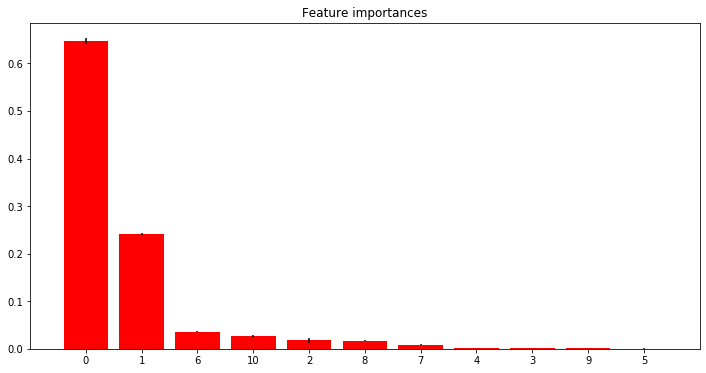

In [36]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

print(X_train.columns.values)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center",tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()